In [21]:
# load packages 
library(reshape2)
library(ggplot2)
library(Rmisc)
library(lme4)
library(lmerTest)
library(brms)
library(gridExtra)

Loading required package: lattice

Loading required package: plyr



In [1]:
# set working directory to dataFiles and read in files
setwd('../dataFiles')
item<-read.csv('collectMem_item.csv')
reg<-read.csv('collectMem_reg.csv')
acc<-read.csv('collectMem_accuracy.csv')
dist<-read.csv('collectMem_distance.csv')

## collective memory for news of the pandemic was stronger, more surprising and negative

In [24]:
# set factor order
item$month <- factor(item$month, c("January", "February", "March","April","May","June","July","August","September","October","November","December"))

# dataframe for retrieved items
itemRem<-subset(item, memory!=0)

In [10]:
# testing how covid was remembered only on retrieved items
summary(mod<-lmer(scale(memory)~covid+(1|subject),data=itemRem,control=lmerControl("bobyqa")))
summary(mod<-lmer(scale(surprise)~covid+(1|subject),data=itemRem,control=lmerControl("bobyqa")))
summary(mod<-lmer(scale(positive)~covid+(1|subject),data=itemRem,control=lmerControl("bobyqa")))
summary(mod<-lmer(scale(negative)~covid+(1|subject),data=itemRem,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(memory) ~ covid + (1 | subject)
   Data: itemRem
Control: lmerControl("bobyqa")

REML criterion at convergence: 8302.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7799 -0.6448  0.2473  0.7316  2.1674 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.1973   0.4442  
 Residual             0.7648   0.8745  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   -0.04968    0.03549  203.93482   -1.40    0.163    
covid          0.80896    0.06401 2906.62431   12.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
covid -0.120

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(surprise) ~ covid + (1 | subject)
   Data: itemRem
Control: lmerControl("bobyqa")

REML criterion at convergence: 8437.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1987 -0.8441 -0.1462  0.8100  2.2696 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.1075   0.3278  
 Residual             0.8249   0.9082  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   -0.06460    0.02881  208.51371  -2.243    0.026 *  
covid          1.05920    0.06646 2910.86557  15.938   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
covid -0.153

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(positive) ~ covid + (1 | subject)
   Data: itemRem
Control: lmerControl("bobyqa")

REML criterion at convergence: 8761.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9774 -0.7693 -0.5904  0.6666  2.5188 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.01901  0.1379  
 Residual             0.96586  0.9828  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    0.03340    0.02076  221.05805   1.609    0.109    
covid         -0.50683    0.07187 2925.30117  -7.052 2.19e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
covid -0.225

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(negative) ~ covid + (1 | subject)
   Data: itemRem
Control: lmerControl("bobyqa")

REML criterion at convergence: 8604.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1109 -0.9094 -0.2884  0.8491  1.8949 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.02771  0.1665  
 Residual             0.91132  0.9546  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   -0.06557    0.02137  211.44553  -3.069  0.00243 ** 
covid          1.01014    0.06982 2915.95588  14.468  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
covid -0.213

In [14]:
# bayesian regression models (for confidence intervals)
brm(scale(memory)~1+covid+(1|subject),data = itemRem, init = "random", cores=10)
brm(scale(surprise)~1+covid+(1|subject),data = itemRem, init = "random", cores=10)
brm(scale(positive)~1+covid+(1|subject),data = itemRem, init = "random", cores=10)
brm(scale(negative)~1+covid+(1|subject),data = itemRem, init = "random", cores=10)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(memory) ~ 1 + covid + (1 | subject) 
   Data: itemRem (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.45      0.03     0.39     0.51 1.00     1490     2173

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.05      0.04    -0.12     0.02 1.00     1759     2764
covid         0.81      0.06     0.68     0.93 1.00     8804     3021

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.87      0.01     0.85     0.90 1.00     8320     3198

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rh

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(surprise) ~ 1 + covid + (1 | subject) 
   Data: itemRem (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.33      0.02     0.28     0.38 1.00     1964     3167

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.06      0.03    -0.12    -0.01 1.00     2802     3155
covid         1.06      0.07     0.93     1.20 1.00    10720     2524

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.91      0.01     0.89     0.93 1.00     7125     3161

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and 

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(positive) ~ 1 + covid + (1 | subject) 
   Data: itemRem (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.13      0.03     0.05     0.19 1.01      853      938

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.03      0.02    -0.01     0.07 1.00     6406     3458
covid        -0.51      0.07    -0.65    -0.36 1.00     8180     2836

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.98      0.01     0.96     1.01 1.00     5371     2483

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and 

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(negative) ~ 1 + covid + (1 | subject) 
   Data: itemRem (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.16      0.03     0.11     0.22 1.00     1638     2429

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.07      0.02    -0.11    -0.02 1.00     5399     3674
covid         1.01      0.07     0.87     1.14 1.00     8265     2359

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.96      0.01     0.93     0.98 1.00     6522     3173

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and 

### testing covid memory accuracy

In [16]:
summary(mod<-lmer(scale(absError)~covid+(1|subject),data=acc,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(absError) ~ covid + (1 | subject)
   Data: acc
Control: lmerControl("bobyqa")

REML criterion at convergence: 8728.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2203 -0.8032 -0.3304  0.5338  3.5947 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.03193  0.1787  
 Residual             0.94620  0.9727  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    0.03665    0.02214  212.14783   1.655   0.0994 .  
covid         -0.60557    0.07115 2916.29735  -8.512   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
covid -0.210

In [17]:
summary(brm(scale(absError)~1+covid+(1|subject),data = acc, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(absError) ~ 1 + covid + (1 | subject) 
   Data: acc (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.18      0.03     0.12     0.23 1.00     1496     2653

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.04      0.02    -0.01     0.08 1.00     5516     3108
covid        -0.61      0.07    -0.74    -0.47 1.00     8943     2832

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.97      0.01     0.95     1.00 1.00     7491     3142

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat

## collective memorability and surprise for news events predicted autobiographical memory

In [18]:
summary(mod<-lm(mem_prop_2020~scale(memory),data=reg))
summary(mod<-lm(mem_prop_2020~scale(surprise),data=reg))
summary(mod<-lm(mem_prop_2020~scale(negative),data=reg))
summary(mod<-lm(mem_prop_2020~scale(positive),data=reg))


Call:
lm(formula = mem_prop_2020 ~ scale(memory), data = reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04911 -0.02881 -0.01152  0.02486  0.11089 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.07696    0.01363   5.646 0.000214 ***
scale(memory)  0.03442    0.01424   2.417 0.036218 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04722 on 10 degrees of freedom
Multiple R-squared:  0.3689,	Adjusted R-squared:  0.3057 
F-statistic: 5.844 on 1 and 10 DF,  p-value: 0.03622



Call:
lm(formula = mem_prop_2020 ~ scale(surprise), data = reg)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.048455 -0.021060 -0.008806  0.021108  0.077938 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.07696    0.01135   6.781 4.86e-05 ***
scale(surprise)  0.04250    0.01185   3.585  0.00497 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03932 on 10 degrees of freedom
Multiple R-squared:  0.5624,	Adjusted R-squared:  0.5187 
F-statistic: 12.85 on 1 and 10 DF,  p-value: 0.00497



Call:
lm(formula = mem_prop_2020 ~ scale(negative), data = reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05717 -0.02011 -0.01246  0.00240  0.14702 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.07696    0.01572   4.897 0.000626 ***
scale(negative)  0.02274    0.01641   1.385 0.196124    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05444 on 10 degrees of freedom
Multiple R-squared:  0.161,	Adjusted R-squared:  0.07708 
F-statistic: 1.919 on 1 and 10 DF,  p-value: 0.1961



Call:
lm(formula = mem_prop_2020 ~ scale(positive), data = reg)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.085748 -0.023722 -0.005584  0.013384  0.120467 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.07696    0.01484   5.184  0.00041 ***
scale(positive)  0.02842    0.01550   1.833  0.09670 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05142 on 10 degrees of freedom
Multiple R-squared:  0.2515,	Adjusted R-squared:  0.1766 
F-statistic:  3.36 on 1 and 10 DF,  p-value: 0.0967


In [19]:
brm(mem_prop_2020~1+scale(memory),data = reg, init = "random", cores=10)
brm(mem_prop_2020~1+scale(surprise),data = reg, init = "random", cores=10)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: mem_prop_2020 ~ 1 + scale(memory) 
   Data: reg (Number of observations: 12) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept       0.08      0.02     0.05     0.11 1.00     3077     2202
scalememory     0.03      0.02     0.00     0.07 1.00     2819     2143

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.05      0.02     0.03     0.09 1.00     2155     2125

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: mem_prop_2020 ~ 1 + scale(surprise) 
   Data: reg (Number of observations: 12) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         0.08      0.01     0.05     0.10 1.00     2820     2250
scalesurprise     0.04      0.01     0.01     0.07 1.00     2845     1849

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.05      0.01     0.03     0.08 1.00     1900     2160

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

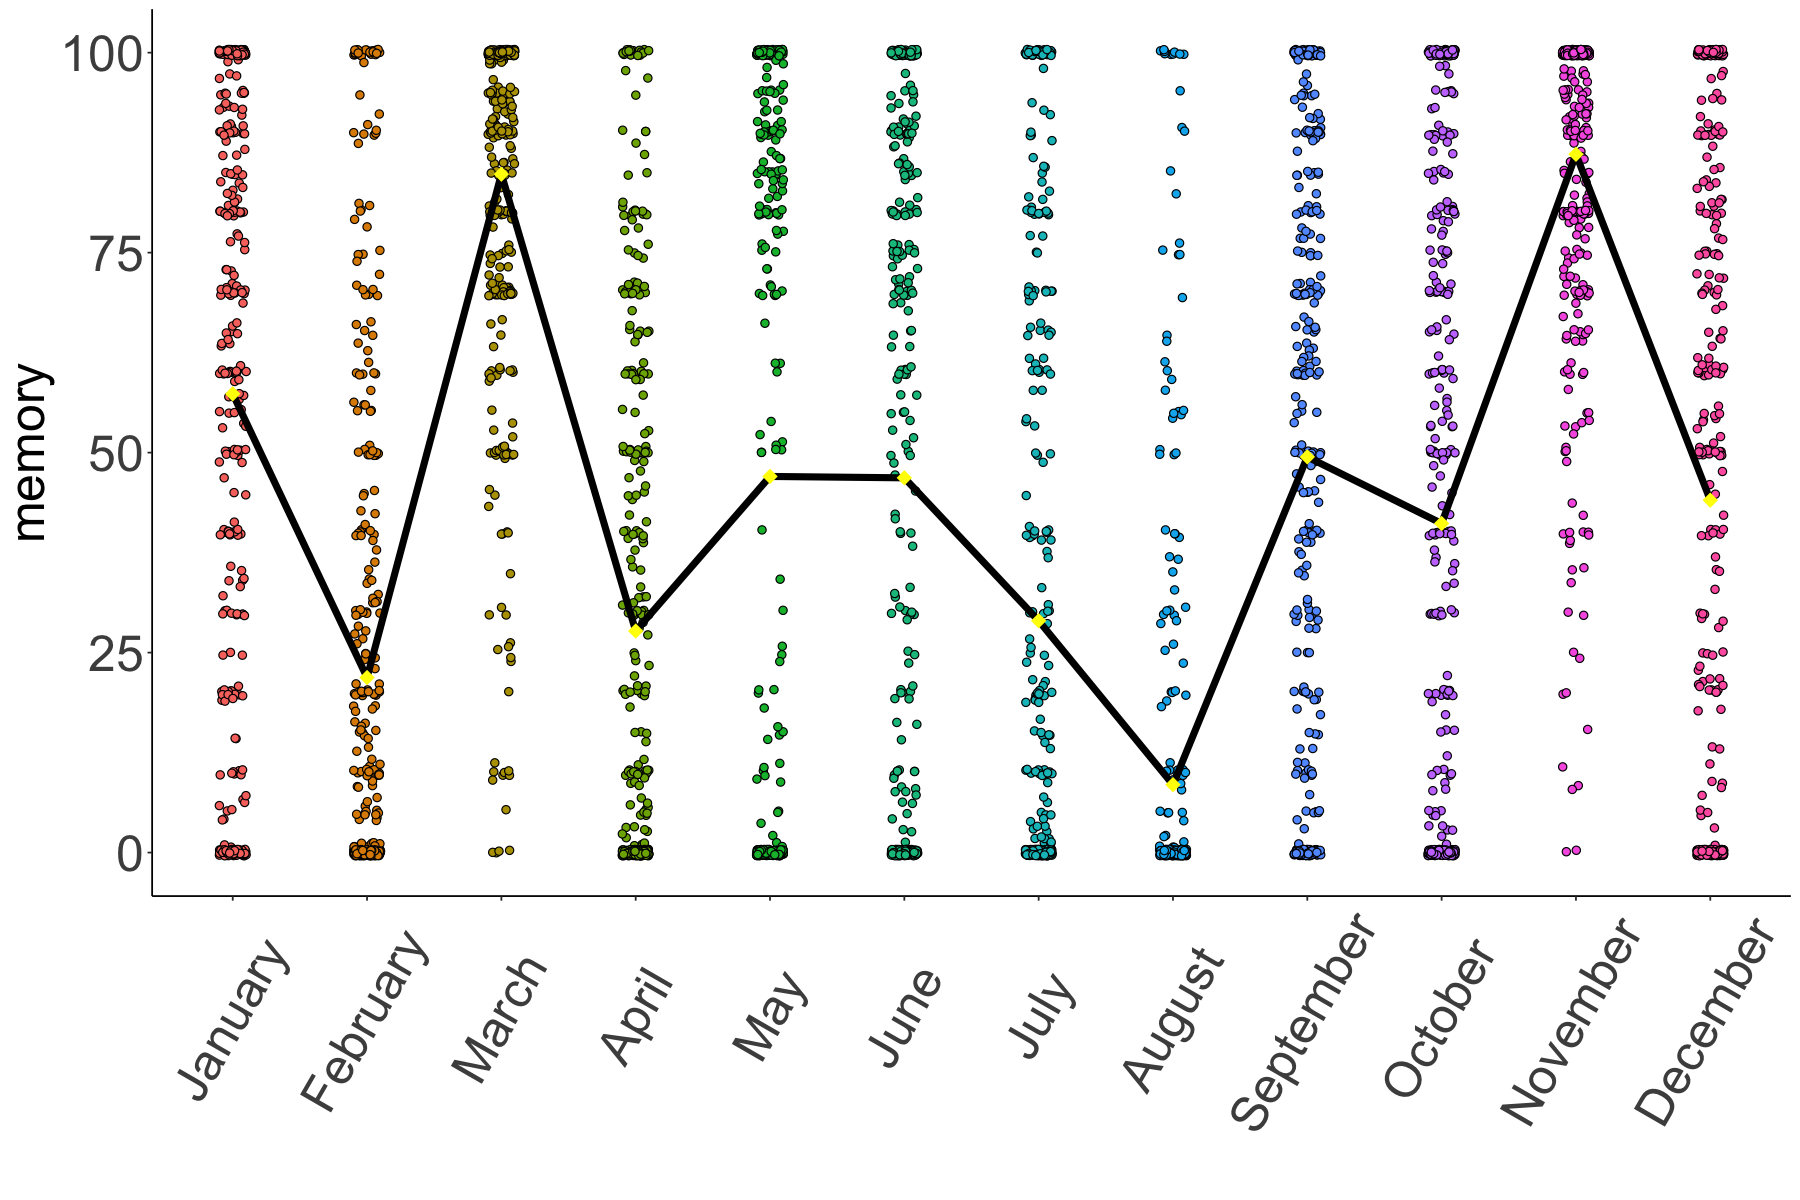

In [25]:
# memorability across months
options(repr.plot.width=15,repr.plot.height=10)

# summary dataframe
itemDF<-summarySE(item,measurevar="memory",groupvars=c("month"),na.rm=TRUE)
itemDF$month <- factor(itemDF$month, c("January", "February", "March","April","May","June","July","August","September","October","November","December"))

ggplot(data = item,aes(x = month, y = memory, fill=month))+ylab('memory')+xlab('')+
  geom_jitter(shape = 21,size=2,alpha=1,width=0.1)+
  geom_line(data=itemDF, aes(group=1),color="black",size=2)+
  geom_point(data=itemDF, size=4,color="yellow",shape=18)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.text.x = element_text(angle=60,hjust = 0.55, vjust = 0.55), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),legend.text=element_text(size=30),legend.title=element_text(size=30),legend.position="none")

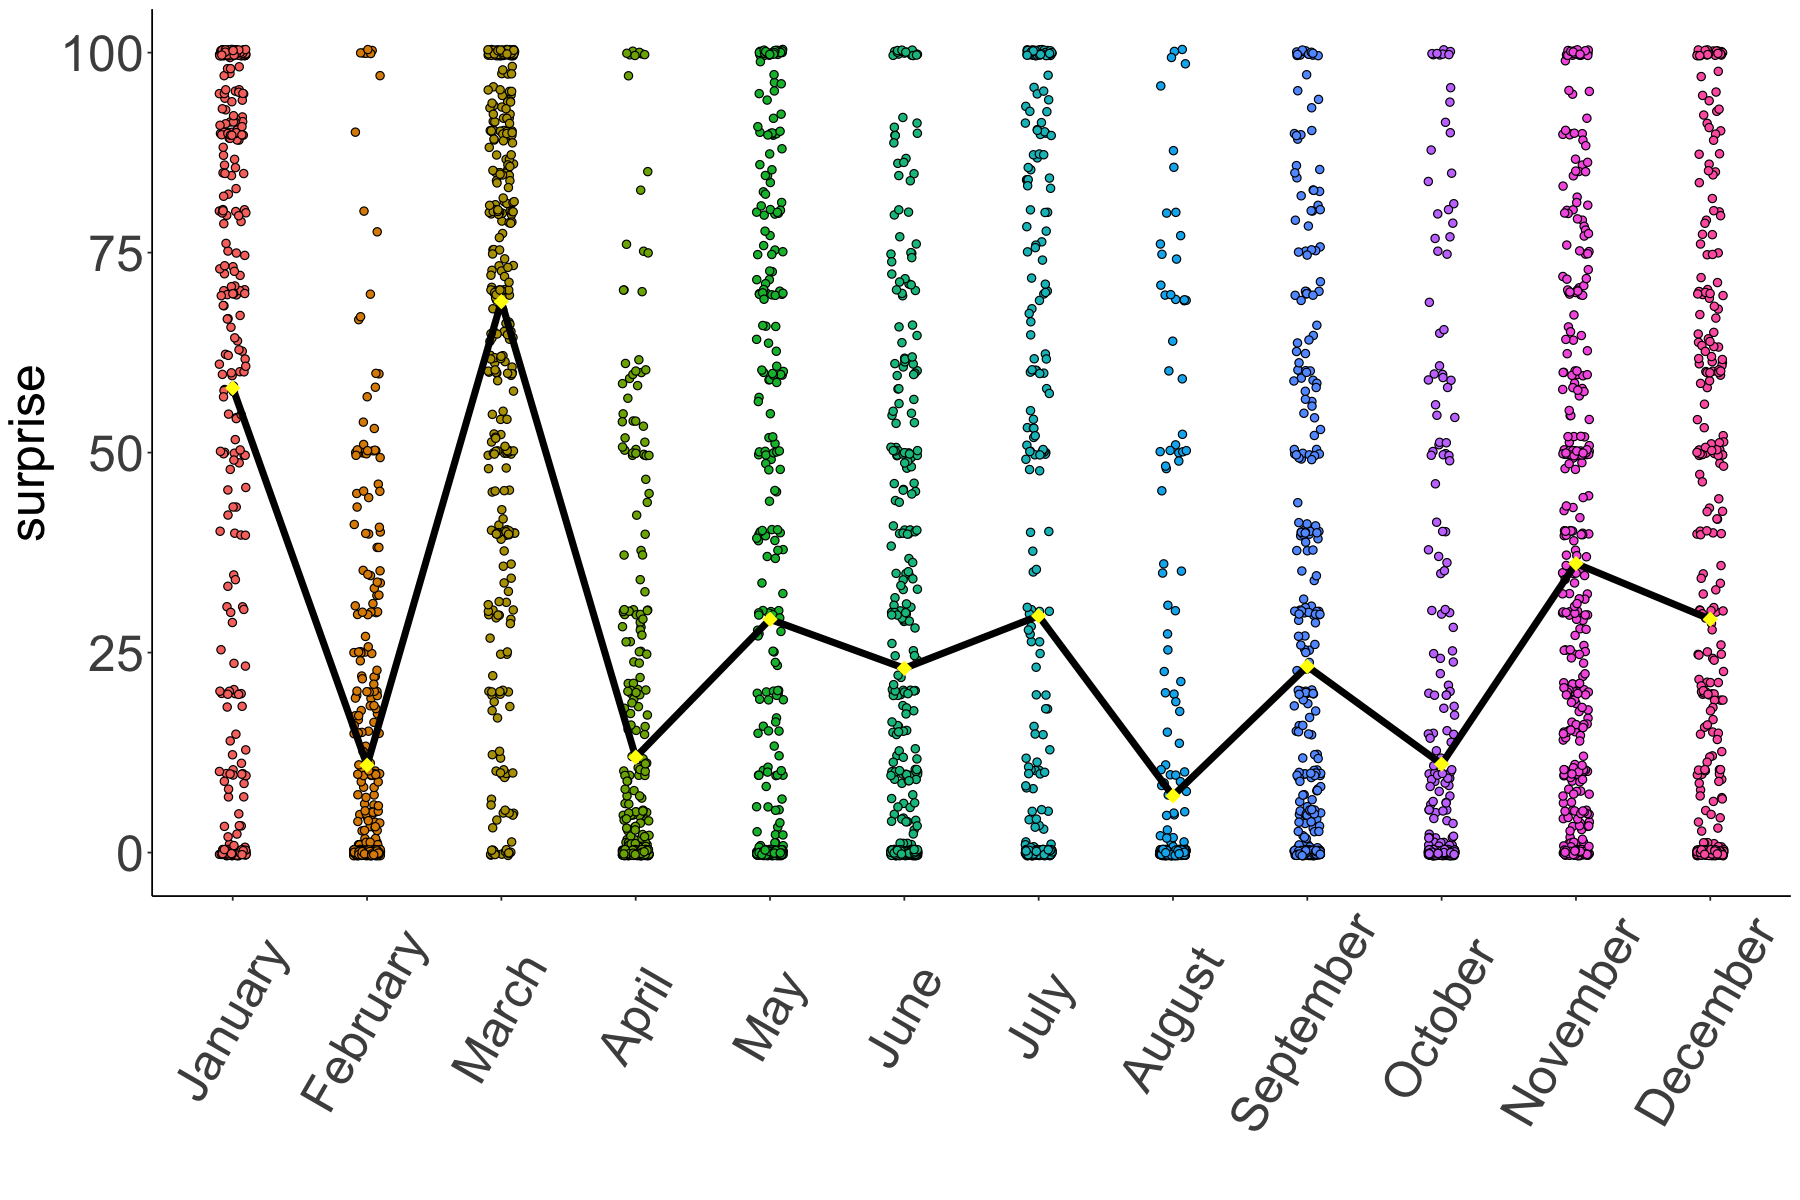

In [26]:
# surprise across months
itemDF<-summarySE(item,measurevar="surprise",groupvars=c("month"),na.rm=TRUE)
itemDF$month <- factor(itemDF$month, c("January", "February", "March","April","May","June","July","August","September","October","November","December"))

options(repr.plot.width=15,repr.plot.height=10)

ggplot(data = item,aes(x = month, y = surprise, fill=month))+ylab('surprise')+xlab('')+
  geom_jitter(shape = 21,size=2,alpha=1,width=0.1)+
  geom_line(data=itemDF, aes(group=1),color="black",size=2)+
  geom_point(data=itemDF, size=4,color="yellow",shape=18)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.text.x = element_text(angle=60,hjust = 0.55, vjust = 0.55), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),legend.text=element_text(size=30),legend.title=element_text(size=30),legend.position="none")

## surprise, positive and negative affect separately enhanced memorability

In [27]:
summary(mod<-lmer(scale(memory)~scale(surprise)+scale(negative)+scale(positive)+(1|subject),data=itemRem,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(memory) ~ scale(surprise) + scale(negative) + scale(positive) +  
    (1 | subject)
   Data: itemRem
Control: lmerControl("bobyqa")

REML criterion at convergence: 6928.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4852 -0.5923  0.1112  0.6593  3.5266 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.1464   0.3827  
 Residual             0.4850   0.6964  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     1.697e-03  2.990e-02 1.984e+02   0.057    0.955    
scale(surprise) 2.294e-01  1.461e-02 3.041e+03  15.700   <2e-16 ***
scale(negative) 5.192e-01  1.695e-02 3.058e+03  30.630   <2e-16 ***
scale(positive) 4.505e-01  1.592e-02 3.055e+03  28.298   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed E

In [131]:
summary(brm(scale(memory)~1+scale(surprise)+scale(negative)+scale(positive)+(1|subject),data = itemRem, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(memory) ~ 1 + scale(surprise) + scale(negative) + scale(positive) + (1 | PROLIFIC_PID) 
   Data: itemRem (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~PROLIFIC_PID (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.38      0.02     0.34     0.43 1.00     1528     2334

Population-Level Effects: 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         0.00      0.03    -0.06     0.06 1.00     1307     2159
scalesurprise     0.23      0.01     0.20     0.26 1.00     5754     3243
scalenegative     0.52      0.02     0.48     0.55 1.00     4588     3448
scalepositive     0.45      0.02     0.42     0.48 1.00     4571     2948

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI

`geom_smooth()` using formula 'y ~ x'



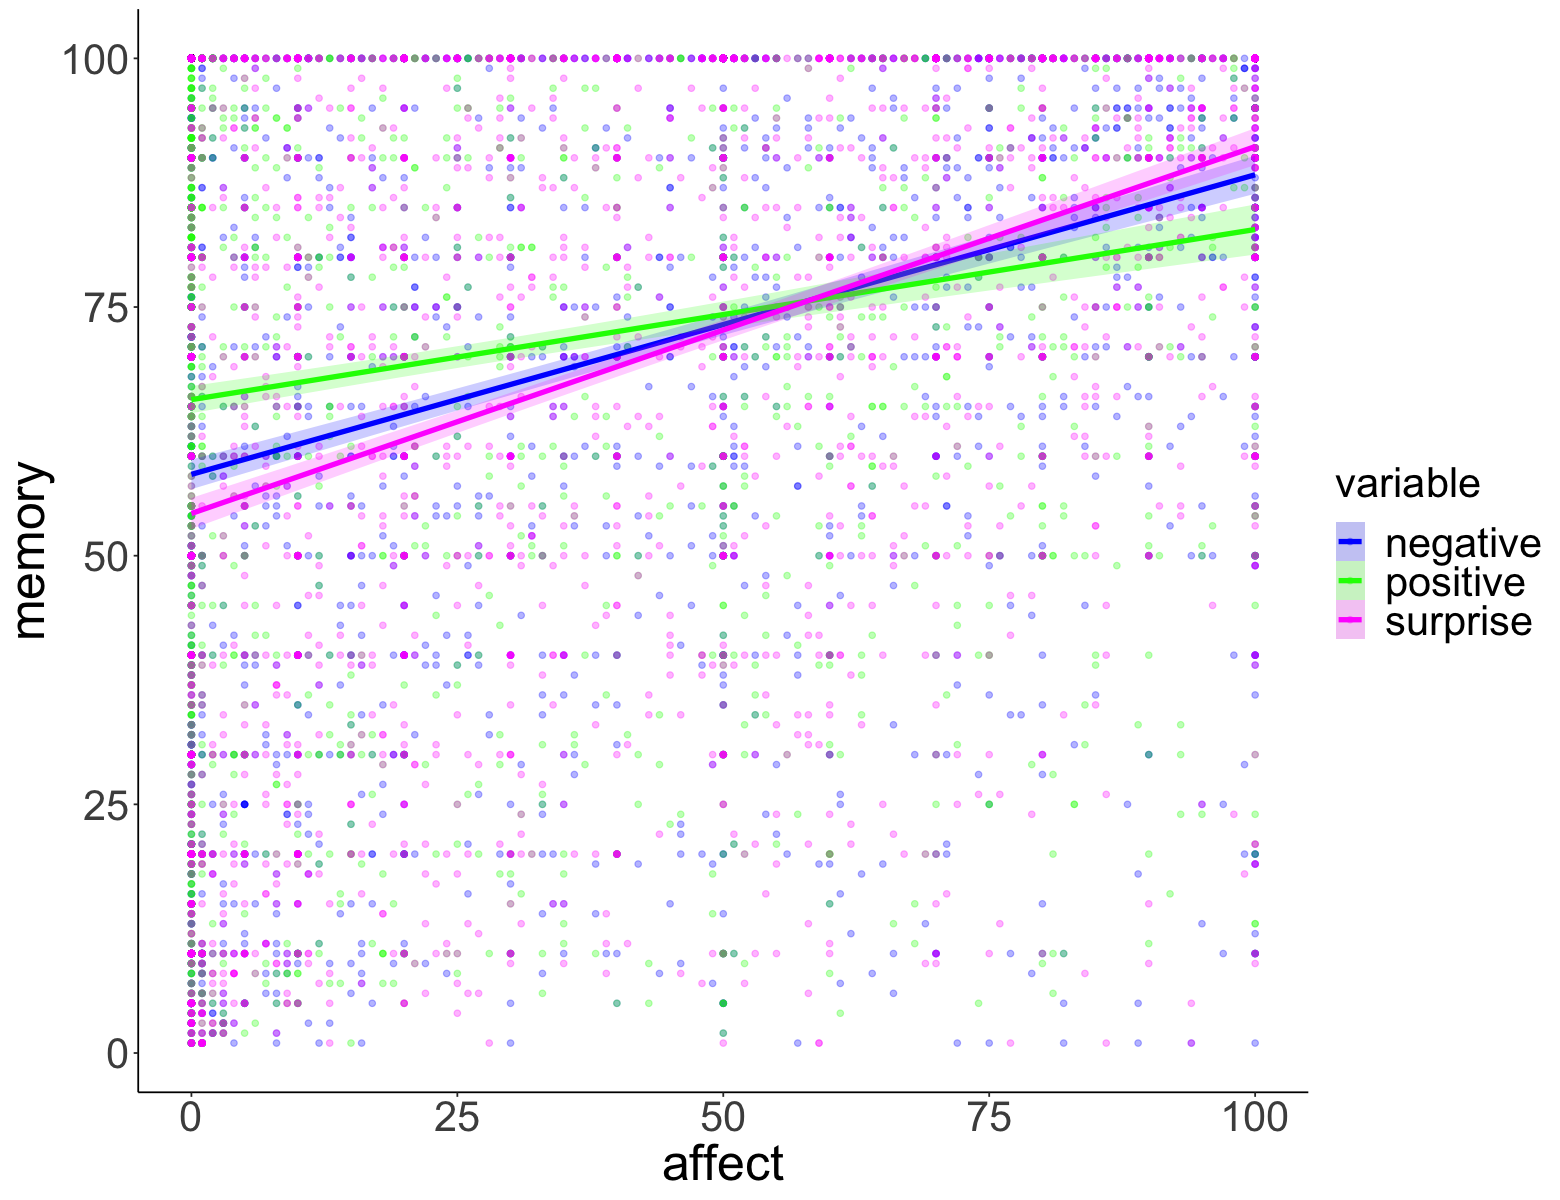

In [29]:
options(repr.plot.width=13,repr.plot.height=10)

itemRem2<-itemRem[,c(4:7)]
item_melt<-melt(itemRem2,id.vars=c("memory"))

ggplot(item_melt,aes(x=value,y=memory,color=variable,fill=variable))+
  geom_point(alpha=0.3,size=1.5)+stat_smooth(method = "lm",alpha=0.2,size=1.5)+
  scale_fill_manual(values=c("blue","green","magenta"))+scale_colour_manual(values=c("blue","green","magenta"))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=25),legend.text=element_text(size=25),legend.title=element_text(size=25))+
  xlab("affect")+ylab("memory")

## lockdown compressed perceived time between events

In [44]:
# subset for only remembered items (and short distance analysis)
distMem<-subset(dist,bothMem==1)
short<-subset(distMem,shortFactor==0)

In [31]:
# actual distance does predict people's estimated subjective distance
summary(mod<-lmer(value~actualDist+(1|subject),data=distMem,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ actualDist + (1 | subject)
   Data: distMem
Control: lmerControl("bobyqa")

REML criterion at convergence: 18190.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.46461 -0.75297 -0.05612  0.79958  2.69756 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept)  22.65    4.759  
 Residual             586.87   24.225  
Number of obs: 1967, groups:  subject, 200

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 3.593e+01  1.102e+00 1.194e+03   32.62   <2e-16 ***
actualDist  1.223e-01  7.732e-03 1.774e+03   15.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
actualDist -0.812

In [32]:
summary(brm(value~1+actualDist+(1|subject),data = distMem, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: value ~ 1 + actualDist + (1 | subject) 
   Data: distMem (Number of observations: 1967) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     4.63      0.98     2.48     6.37 1.00      970      968

Population-Level Effects: 
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     35.91      1.12    33.73    38.07 1.00     7104     3334
actualDist     0.12      0.01     0.11     0.14 1.00     7436     3065

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    24.25      0.41    23.44    25.05 1.00     4535     2549

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rh

In [46]:
# before-lockdown as baseline
distMem$lockdownFactor<- factor(distMem$lockdownFactor, c("bl", "l", "al"))
summary(mod<-lmer(propDiff~lockdownFactor+actualDist+(1|subject),data=distMem,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: propDiff ~ lockdownFactor + actualDist + (1 | subject)
   Data: distMem
Control: lmerControl("bobyqa")

REML criterion at convergence: 47.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.61013 -0.74996 -0.03794  0.78657  2.63090 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.002427 0.04926 
 Residual             0.056859 0.23845 
Number of obs: 1967, groups:  subject, 200

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       3.605e-01  1.220e-02  1.445e+03  29.547  < 2e-16 ***
lockdownFactorl  -8.282e-02  1.587e-02  1.773e+03  -5.217 2.03e-07 ***
lockdownFactoral  1.624e-02  1.552e-02  1.793e+03   1.046    0.296    
actualDist       -1.239e-03  9.162e-05  1.771e+03 -13.527  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
    

In [47]:
brm(propDiff~1+lockdownFactor+actualDist+(1|subject),data = distMem, init = "random", cores=10)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: propDiff ~ 1 + lockdownFactor + actualDist + (1 | subject) 
   Data: distMem (Number of observations: 1967) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.05      0.01     0.03     0.07 1.00     1437     1534

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept            0.36      0.01     0.34     0.38 1.00     3795     3155
lockdownFactorl     -0.08      0.02    -0.11    -0.05 1.00     4066     3114
lockdownFactoral     0.02      0.02    -0.02     0.05 1.00     4358     3115
actualDist          -0.00      0.00    -0.00    -0.00 1.00     3896     3095

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS


In [48]:
# after-lockdown as baseline
distMem$lockdownFactor<- factor(distMem$lockdownFactor, c("al", "l", "bl"))
summary(mod<-lmer(propDiff~lockdownFactor+actualDist+(1|subject),data=distMem,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: propDiff ~ lockdownFactor + actualDist + (1 | subject)
   Data: distMem
Control: lmerControl("bobyqa")

REML criterion at convergence: 47.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.61013 -0.74996 -0.03794  0.78657  2.63090 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.002427 0.04926 
 Residual             0.056859 0.23845 
Number of obs: 1967, groups:  subject, 200

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       3.767e-01  1.489e-02  1.807e+03  25.296  < 2e-16 ***
lockdownFactorl  -9.906e-02  1.337e-02  1.785e+03  -7.407 1.98e-13 ***
lockdownFactorbl -1.624e-02  1.552e-02  1.793e+03  -1.046    0.296    
actualDist       -1.239e-03  9.162e-05  1.771e+03 -13.527  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
    

In [49]:
brm(propDiff~1+lockdownFactor+actualDist+(1|subject),data = distMem, init = "random", cores=10)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: propDiff ~ 1 + lockdownFactor + actualDist + (1 | subject) 
   Data: distMem (Number of observations: 1967) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.05      0.01     0.03     0.06 1.00     1180     1259

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept            0.38      0.01     0.35     0.41 1.00     4828     3496
lockdownFactorl     -0.10      0.01    -0.13    -0.07 1.00     4975     2938
lockdownFactorbl    -0.02      0.02    -0.05     0.01 1.00     5072     3042
actualDist          -0.00      0.00    -0.00    -0.00 1.00     4726     3653

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS


In [50]:
# direct short contrast

# before-lockdown as baseline
short$lockdownFactor <- factor(short$lockdownFactor, c("bl", "l", "al"))
summary(mod<-lmer(value~lockdownFactor+actualDist+(1|subject),data=short,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ lockdownFactor + actualDist + (1 | subject)
   Data: short
Control: lmerControl("bobyqa")

REML criterion at convergence: 9958.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0082 -0.7190 -0.1741  0.7440  2.7174 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept)  76.55    8.749  
 Residual             493.59   22.217  
Number of obs: 1089, groups:  subject, 200

Fixed effects:
                  Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       35.46400    4.10167 974.06468   8.646  < 2e-16 ***
lockdownFactorl   -8.21865    1.83650 901.41106  -4.475 8.61e-06 ***
lockdownFactoral  -0.09599    1.96095 899.30291  -0.049   0.9610    
actualDist         0.16291    0.07095 895.60402   2.296   0.0219 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
                 (Intr) loc

In [51]:
brm(value~1+lockdownFactor+actualDist+(1|subject),data = short, init = "random", cores=10)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: value ~ 1 + lockdownFactor + actualDist + (1 | subject) 
   Data: short (Number of observations: 1089) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     8.74      1.03     6.74    10.73 1.00     1280     2568

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept           35.47      4.09    27.55    43.58 1.00     5590     3087
lockdownFactorl     -8.26      1.86   -11.88    -4.63 1.00     5586     3076
lockdownFactoral    -0.11      1.97    -4.01     3.75 1.00     7334     2850
actualDist           0.16      0.07     0.03     0.30 1.00     6171     3225

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma

In [52]:
# after lockdown as baseline
short$lockdownFactor <- factor(short$lockdownFactor, c("al", "l", "bl"))
summary(mod<-lmer(value~lockdownFactor+actualDist+(1|subject),data=short,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ lockdownFactor + actualDist + (1 | subject)
   Data: short
Control: lmerControl("bobyqa")

REML criterion at convergence: 9958.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0082 -0.7190 -0.1741  0.7440  2.7174 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept)  76.55    8.749  
 Residual             493.59   22.217  
Number of obs: 1089, groups:  subject, 200

Fixed effects:
                  Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       35.36801    4.03141 981.62410   8.773  < 2e-16 ***
lockdownFactorl   -8.12266    2.44311 898.87283  -3.325 0.000921 ***
lockdownFactorbl   0.09599    1.96095 899.30291   0.049 0.960971    
actualDist         0.16291    0.07095 895.60401   2.296 0.021908 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) lckdwnFc

In [53]:
brm(value~1+lockdownFactor+actualDist+(1|subject),data = short, init = "random", cores=10)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: value ~ 1 + lockdownFactor + actualDist + (1 | subject) 
   Data: short (Number of observations: 1089) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     8.75      1.05     6.73    10.86 1.00     1615     2007

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept           35.35      4.05    27.56    43.08 1.00     7368     3312
lockdownFactorl     -8.12      2.42   -12.81    -3.37 1.00     4839     2781
lockdownFactorbl     0.08      1.91    -3.75     3.83 1.00     5614     2779
actualDist           0.16      0.07     0.02     0.30 1.00     6197     3192

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma

In [33]:
# prepare plot
# overall
distMem$ld<-ifelse(distMem$lockdownFactor=="bl","pre-lockdown",NA)
distMem$ld<-ifelse(distMem$lockdownFactor=="l","lockdown",distMem$ld)
distMem$ld<-ifelse(distMem$lockdownFactor=="al","post-lockdown",distMem$ld)
distMem$ld <- factor(distMem$ld , c("pre-lockdown", "lockdown", "post-lockdown"))

# controlled distances
short$monthDiff<-ifelse(short$lockdownFactor=='al','sept-nov',NA)
short$monthDiff<-ifelse(short$lockdownFactor=='bl','jan-march',short$monthDiff)
short$monthDiff<-ifelse(short$lockdownFactor=='l','march-may',short$monthDiff)
shortDF<-summarySE(short,measurevar="value",groupvars=c("monthDiff","subject"),na.rm=TRUE)
shortDF2<-summarySE(short,measurevar="value",groupvars=c("monthDiff"),na.rm=TRUE)

Warning message in qt(conf.interval/2 + 0.5, datac$N - 1):
“NaNs produced”


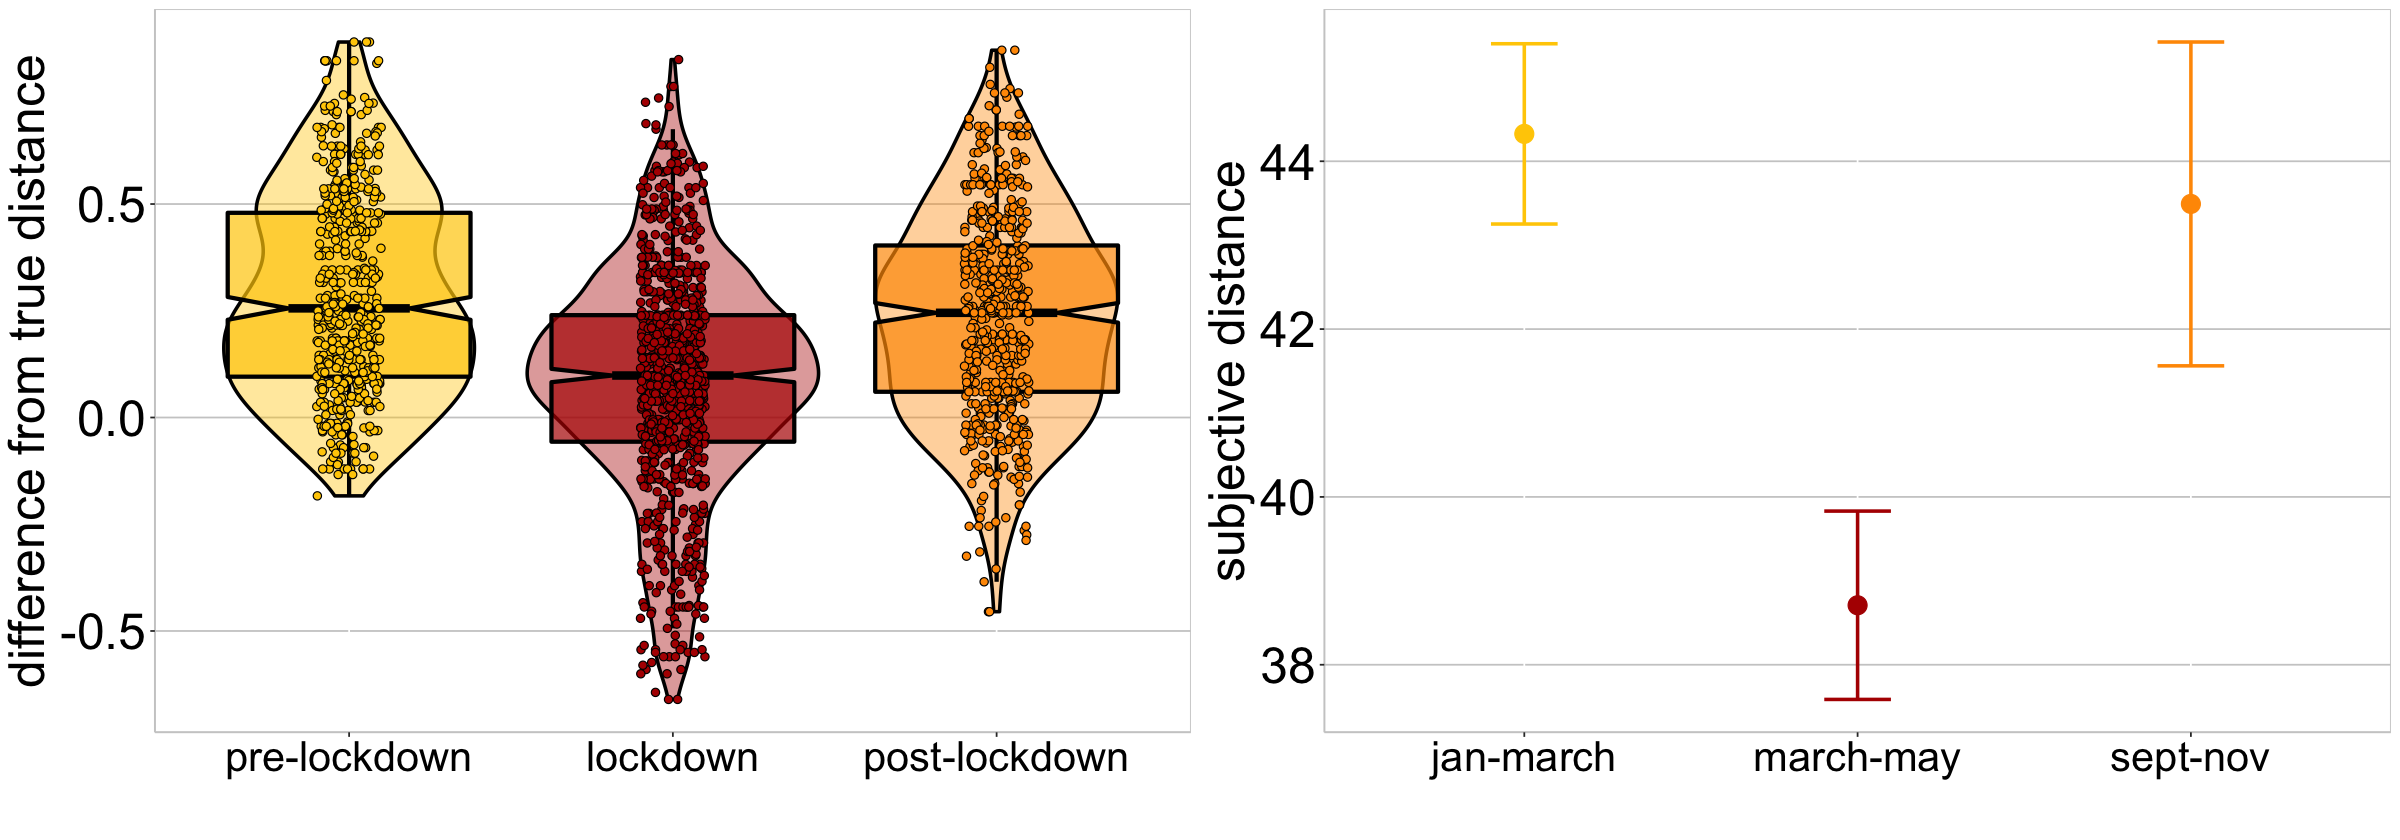

In [39]:
options(repr.plot.width=20,repr.plot.height=7)

p1<-ggplot(data = distMem,aes(x = ld, y = propDiff, fill=ld))+ylab('difference from true distance')+xlab('')+
    geom_violin(alpha=0.4, position = position_dodge(width = .75),size=1,color="black") +
    geom_boxplot(notch = TRUE,  outlier.size = -1, color="black",lwd=1.2, alpha = 0.7)+
    geom_jitter(shape = 21,size=2,alpha=1,width=0.1)+scale_fill_manual(values=c("#ffcc00","#b30000","#ff9900"))+ 
    theme(panel.background = element_rect(fill = "white"), panel.border = element_rect(color = "grey80",fill=NA),panel.grid.major.y = element_line(color = "grey80"),axis.line.x = element_line(colour = "grey80"), axis.text.x = element_text(color="black",size=25), axis.text.y = element_text(color="black"), axis.line.y = element_line(colour = "grey80"),axis.title = element_text(size=30),axis.text = element_text(size=30),legend.text=element_text(size=30),legend.title=element_text(size=30),legend.position="none")

p2<-ggplot(data = shortDF2,aes(x = monthDiff, y = value, color=monthDiff))+ylab('subjective distance')+xlab('')+
    geom_errorbar(aes(ymin=value-se, ymax=value+se),width=0.2,size=1)+
    geom_point(size=5)+scale_color_manual(values=c("#ffcc00","#b30000","#ff9900"))+ 
    theme(panel.background = element_rect(fill = "white"), panel.border = element_rect(color = "grey80",fill=NA),panel.grid.major.y = element_line(color = "grey80"),axis.line.x = element_line(colour = "grey80"), axis.text.x = element_text(color="black",size=25), axis.text.y = element_text(color="black"), axis.line.y = element_line(colour = "grey80"),axis.title = element_text(size=30),axis.text = element_text(size=30),legend.text=element_text(size=30),legend.title=element_text(size=30),legend.position="none")

grid.arrange(p1,p2,ncol=2,nrow=1)